In [ ]:
#tratamiento de datos
import pandas as pd 
import numpy as np # funciones matematicas: algoritmos, matrices,algebra
#graficos
import matplotlib.pyplot as plt 
import statsmodels.api as sm # funciones de series temporales
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg 
from datetime import timedelta
from statsmodels.tsa.ar_model import AR 
from statsmodels.tsa.stattools import  adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from time import time 

# @title Dataframe desde archivo CVS
# df1 = pd.read_csv("lista_personas - Hoja 1.csv")

# Tratamiento de los datos como CSV
### En construcción...


In [2]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1fPlFOgW4QyzF2RcPA_HKgjAVj5muOCtN/export?format=csv")

In [3]:
#@title datos muestra
df

,Departamento,Año,Mes,Promedios_moviles_Ocupados_H,Promedios_Moviles_Ocupados_M,Promedios_Moviles_Ocupados_Total,Promedios_Moviles_Desocupados_H,Promedios_Moviles_Desocupados_M,Promedios_Moviles_Des_Total,Promedios_Moviles_Inac_H,Promedios_Moviles_Inac_M,Promedios_Moviles_Inac_T
0,ATLANTIDA,2001,1/1/2001,66929,21562,88491,1606,417,2023,56224,107446,163670
1,COLON,2001,2/1/2001,47890,11327,59217,1008,385,1393,36644,73884,110528
2,COMAYAGUA,2001,3/1/2001,77800,18450,96250,1714,306,2020,50272,112428,162700
3,COPAN,2001,4/1/2001,64206,17113,81319,1443,369,1812,47713,97919,145633
4,CORTES,2001,5/1/2001,63299,15630,78929,1388,353,1742,44876,94744,139620
5,CHOLUTECA,2001,6/1/2001,68435,17064,85499,1515,343,1858,47621,101697,149318
6,EL PARAISO,2001,7/1/2001,65313,16602,81916,1449,355,1804,46737,98120,144857
7,FRANCISCO MORAZAN,2001,8/1/2001,65682,16432,82115,1451,351,1801,46411,98187,144598
8,GRACIAS A DIOS,2001,9/1/2001,66477,16700,83177,1471,350,1821,46923,99335,146258
9,INTIBUCA,2001,10/1/2001,65824,16578,82402,1457,352,1809,46690,98547,145238


In [4]:
#@title Estadística básica
datos = df.describe()
datos

,Año,Promedios_moviles_Ocupados_H,Promedios_Moviles_Ocupados_M,Promedios_Moviles_Ocupados_Total,Promedios_Moviles_Desocupados_H,Promedios_Moviles_Desocupados_M,Promedios_Moviles_Des_Total,Promedios_Moviles_Inac_H,Promedios_Moviles_Inac_M,Promedios_Moviles_Inac_T
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2007.000000,65787.361111,16635.972222,82423.611111,1457.972222,352.972222,1810.583333,46801.222222,98605.694444,145406.972222
std,6.085111,3717.682728,1279.085711,4754.810726,92.404232,14.935071,87.925740,2446.987619,5090.089355,7367.533158
min,2001.000000,47890.000000,11327.000000,59217.000000,1008.000000,306.000000,1393.000000,36644.000000,73884.000000,110528.000000
25%,2001.000000,66014.000000,16594.000000,82607.750000,1460.750000,351.000000,1811.000000,46721.000000,98744.750000,145467.000000
50%,2007.000000,66018.000000,16594.000000,82612.000000,1461.000000,351.000000,1811.000000,46721.000000,98750.000000,145471.000000
75%,2013.000000,66019.250000,16594.250000,82613.000000,1461.000000,351.000000,1812.000000,46722.250000,98750.000000,145472.000000
max,2013.000000,77800.000000,21562.000000,96250.000000,1714.000000,417.000000,2023.000000,56224.000000,112428.000000,163670.000000


In [ ]:
df1 = pd.read_csv("https://docs.google.com/spreadsheets/d/1YeKAUkaCAKrohKwuK9UJF-oK4d7H-ZCnCEw7FFltZkw/export?format=csv")

In [6]:
#@title datos muestra 2001 
df1

,Departamento,Año,Mes,Promedios_moviles_Ocupados_H,Promedios_Moviles_Ocupados_M,Promedios_Moviles_Ocupados_Total,Promedios_Moviles_Desocupados_H,Promedios_Moviles_Desocupados_M,Promedios_Moviles_Des_Total,Promedios_Moviles_Inac_H,Promedios_Moviles_Inac_M,Promedios_Moviles_Inac_T
0,ATLANTIDA,2001,1/1/2001,"66,929.00","21,562.00","88,491.00","1,606.00",417.00,"2,023.00","56,224.00","107,446.00","163,670.00"
1,COLON,2001,1/2/2001,"47,890.00","11,327.00","59,217.00","1,008.00",385.00,"1,393.00","36,644.00","73,884.00","110,528.00"
2,COMAYAGUA,2001,1/3/2001,"77,800.00","18,450.00","96,250.00","1,714.00",306.00,"2,020.00","50,272.00","112,428.00","162,700.00"
3,COPAN,2001,1/4/2001,"64,206.33","17,113.00","81,319.33","1,442.67",369.33,"1,812.00","47,713.33","97,919.33","145,632.67"
4,CORTES,2001,1/5/2001,"63,298.78","15,630.00","78,928.78","1,388.22",353.44,"1,741.67","44,876.44","94,743.78","139,620.22"
5,CHOLUTECA,2001,1/6/2001,"68,435.04","17,064.33","85,499.37","1,514.96",342.93,"1,857.89","47,620.59","101,697.04","149,317.63"
6,EL PARAISO,2001,1/7/2001,"65,313.38","16,602.44","81,915.83","1,448.62",355.23,"1,803.85","46,736.79","98,120.05","144,856.84"
7,FRANCISCO MORAZAN,2001,1/8/2001,"65,682.40","16,432.26","82,114.66","1,450.60",350.53,"1,801.14","46,411.28","98,186.95","144,598.23"
8,GRACIAS A DIOS,2001,1/9/2001,"66,476.94","16,699.68","83,176.62","1,471.39",349.57,"1,820.96","46,922.89","99,334.68","146,257.57"
9,INTIBUCA,2001,1/10/2001,"65,824.24","16,578.13","82,402.37","1,456.87",351.78,"1,808.65","46,690.32","98,547.23","145,237.55"


In [7]:
c=66010
AR1=36
Modelo = c+(AR1*df[' Promedios_moviles_Ocupados_H '])
Modelo 

0     2475454
1     1790050
2     2866810
3     2377426
4     2344774
5     2529670
6     2417278
7     2430562
8     2459182
9     2435674
10    2441830
11    2445574
12    2441002
13    2442802
14    2443126
15    2442298
16    2442730
17    2442730
18    2442586
19    2442694
20    2442658
21    2442658
22    2442658
23    2442658
24    2442658
25    2442658
26    2442658
27    2442658
28    2442658
29    2442658
30    2442658
31    2442658
32    2442658
33    2442658
34    2442658
35    2442658
Name:  Promedios_moviles_Ocupados_H , dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


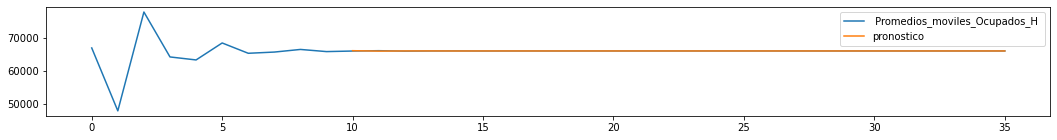

In [8]:
#paso 3: Aplicacion del modelo AR sobre los datos
modelo= sm.tsa.AR(df[' Promedios_moviles_Ocupados_H '].iloc[1:]) #Aplicacion del Modelo
resultados = modelo.fit(disp=-2)
df['pronostico'] = resultados.fittedvalues
plot = df[[' Promedios_moviles_Ocupados_H ', 'pronostico']].plot(figsize=(18,2))

In [9]:
X = df[" Promedios_moviles_Ocupados_H "].values # con los datos de los dos años 2001 y 2013
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria.

ADF Statistic: -1.311958
p-value: 0.623684
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
failed to Reject Ho - Time series is Non-Stationary


In [10]:
X = df[" Promedios_Moviles_Ocupados_M "].values # con los datos de los dos años 2001 y 2013
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria.

ADF Statistic: -0.774884
p-value: 0.826388
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
failed to Reject Ho - Time series is Non-Stationary


In [11]:
X = df[" Promedios_Moviles_Ocupados_Total "].values # con los datos de los dos años 2001 y 2013
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria.

ADF Statistic: -1.488932
p-value: 0.538979
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
failed to Reject Ho - Time series is Non-Stationary


In [12]:
X = df[" Promedios_Moviles_Desocupados_H "].values # con los datos de los dos años 2001 y 2013
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria.

ADF Statistic: -0.686844
p-value: 0.850128
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
failed to Reject Ho - Time series is Non-Stationary


In [13]:
X = df[" Promedios_Moviles_Desocupados_M "].values # con los datos de los dos años 2001 y 2013
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria.

ADF Statistic: -8.600300
p-value: 0.000000
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613
Rejet Ho - Time series is Stationary


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [14]:
X = df[" Promedios_Moviles_Des_Total "].values # con los datos de los dos años 2001 y 2013
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria.

ADF Statistic: -1.724134
p-value: 0.418723
Critical Values:
	1%: -3.670
	5%: -2.964
	10%: -2.621
failed to Reject Ho - Time series is Non-Stationary


In [15]:
X = df[" Promedios_Moviles_Inac_H "].values # con los datos de los dos años 2001 y 2013
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria.

ADF Statistic: -1.685971
p-value: 0.438355
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616
failed to Reject Ho - Time series is Non-Stationary


In [16]:
X = df[" Promedios_Moviles_Inac_M "].values # con los datos de los dos años 2001 y 2013
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria.

ADF Statistic: -1.371974
p-value: 0.595636
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
failed to Reject Ho - Time series is Non-Stationary


In [17]:
X = df[" Promedios_Moviles_Inac_T "].values # con los datos de los dos años 2001 y 2013
result = adfuller(X) # ADF Prueba de Dickey-Fuller aumentada es una prueba de raiz unitaria para una muestra de una serie de tiempo
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:') # Impresion de valores criticos
for key, value in result[4].items():
  print('\t%s: %.3f' %  (key, value))

if result[0] < result[4]["5%"]: # para un nivel del 5 % de confianza 
  print ("Rejet Ho - Time series is Stationary") # Rechazamos H0 y la serie de tiempo es estacionaria 
else: 
  print ("failed to Reject Ho - Time series is Non-Stationary") # No rechazamos H0 y la serie de tiempo es no-estacionaria.

ADF Statistic: -3.840736
p-value: 0.002517
Critical Values:
	1%: -3.689
	5%: -2.972
	10%: -2.625
Rejet Ho - Time series is Stationary


In [18]:
columna = " Promedios_moviles_Ocupados_H "
media = df[columna].sum()/df[columna].count()
media

65787.36111111111

In [19]:
varianza = (((df[columna]-media)*(df[columna]-media)).sum())/(df[columna].count()-1)
varianza 

13821164.865873015

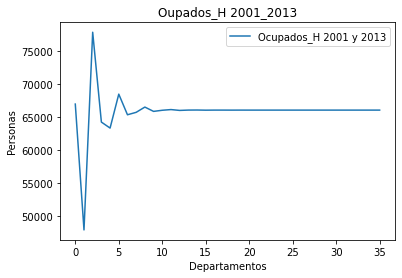

In [20]:
fig, ax = plt.subplots()  
ax.plot(df[" Promedios_moviles_Ocupados_H "], label='Ocupados_H 2001 y 2013')

ax.set_xlabel('Departamentos')
ax.set_ylabel('Personas')
ax.set_title("Oupados_H 2001_2013")
ax.legend()

In [21]:
columna = " Promedios_moviles_Ocupados_H "
media = df[columna].sum()/df[columna].count()
media

65787.36111111111

In [22]:
varianza = (((df[columna]-media)*(df[columna]-media)).sum())/(df[columna].count()-1)
varianza 

13821164.865873015

In [23]:
columna = " Promedios_Moviles_Ocupados_M "
media = df[columna].sum()/df[columna].count()
media

16635.972222222223

In [24]:
varianza = (((df[columna]-media)*(df[columna]-media)).sum())/(df[columna].count()-1)
varianza 

1636060.2563492064

In [25]:
columna = " Promedios_Moviles_Ocupados_Total "
media = df[columna].sum()/df[columna].count()
media

82423.61111111111

In [26]:
varianza = (((df[columna]-media)*(df[columna]-media)).sum())/(df[columna].count()-1)
varianza 

22608225.044444446

In [27]:
columna = " Promedios_Moviles_Desocupados_H "
media = df[columna].sum()/df[columna].count()
media

1457.9722222222222

In [28]:
varianza = (((df[columna]-media)*(df[columna]-media)).sum())/(df[columna].count()-1)
varianza 

8538.542063492067

In [29]:
columna = " Promedios_Moviles_Desocupados_M "
media = df[columna].sum()/df[columna].count()
media

352.97222222222223

In [30]:
varianza = (((df[columna]-media)*(df[columna]-media)).sum())/(df[columna].count()-1)
varianza 

223.05634920634924

In [31]:
columna = " Promedios_Moviles_Des_Total "
media = df[columna].sum()/df[columna].count()
media

1810.5833333333333

In [32]:
varianza = (((df[columna]-media)*(df[columna]-media)).sum())/(df[columna].count()-1)
varianza 

7730.935714285714

In [33]:
columna = " Promedios_Moviles_Inac_H "
media = df[columna].sum()/df[columna].count()
media

46801.22222222222

In [34]:
varianza = (((df[columna]-media)*(df[columna]-media)).sum())/(df[columna].count()-1)
varianza 

5987748.406349205

In [35]:
columna = " Promedios_Moviles_Inac_M "
media = df[columna].sum()/df[columna].count()
media

98605.69444444444

In [36]:
varianza = (((df[columna]-media)*(df[columna]-media)).sum())/(df[columna].count()-1)
varianza 

25909009.646825407

In [37]:
columna = " Promedios_Moviles_Inac_T "
media = df[columna].sum()/df[columna].count()
media

145406.97222222222

In [38]:
varianza = (((df[columna]-media)*(df[columna]-media)).sum())/(df[columna].count()-1)
varianza 

54280544.827777766

In [39]:
# % Modelo AR.1 Ocupados Hombres
ar_model = AutoReg(df[' Promedios_moviles_Ocupados_H '], lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


                                  AutoReg Model Results                                   
Dep. Variable:      Promedios_moviles_Ocupados_H    No. Observations:                   36
Model:                                 AutoReg(1)   Log Likelihood                -331.521
Method:                           Conditional MLE   S.D. of innovations           3143.506
Date:                            Fri, 13 Aug 2021   AIC                             16.278
Time:                                    15:02:48   BIC                             16.411
Sample:                                         1   HQIC                            16.324
                                               36                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
intercept                          1.007e+05   9417.245     10.694  

In [40]:
# % Modelo AR.2 Ocupados Hombres
ar_model = AutoReg(df[' Promedios_moviles_Ocupados_H '], lags=2).fit()
#
# Print Summary
#
print(ar_model.summary())

                                  AutoReg Model Results                                   
Dep. Variable:      Promedios_moviles_Ocupados_H    No. Observations:                   36
Model:                                 AutoReg(2)   Log Likelihood                  -0.690
Method:                           Conditional MLE   S.D. of innovations              0.247
Date:                            Fri, 13 Aug 2021   AIC                             -2.562
Time:                                    15:02:48   BIC                             -2.382
Sample:                                         2   HQIC                            -2.501
                                               36                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
intercept                           1.32e+05      1.528   8.64e+04  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [41]:
# % Modelo AR.1 Ocupados Mujeres
ar_model = AutoReg(df[' Promedios_Moviles_Ocupados_M '], lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


                                  AutoReg Model Results                                   
Dep. Variable:      Promedios_Moviles_Ocupados_M    No. Observations:                   36
Model:                                 AutoReg(1)   Log Likelihood                -269.372
Method:                           Conditional MLE   S.D. of innovations            532.404
Date:                            Fri, 13 Aug 2021   AIC                             12.726
Time:                                    15:02:49   BIC                             12.860
Sample:                                         1   HQIC                            12.772
                                               36                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
intercept                           2.69e+04   1174.015     22.910  

In [84]:
# % Modelo AR.2 Ocupados Mujeres 
ar_model = AutoReg(df[' Promedios_Moviles_Ocupados_M '], lags=2).fit()
#
# Print Summary
#
print(ar_model.summary())

                                  AutoReg Model Results                                   
Dep. Variable:      Promedios_Moviles_Ocupados_M    No. Observations:                   36
Model:                                 AutoReg(2)   Log Likelihood                  -8.022
Method:                           Conditional MLE   S.D. of innovations              0.306
Date:                            Fri, 13 Aug 2021   AIC                             -2.131
Time:                                    15:51:12   BIC                             -1.951
Sample:                                         2   HQIC                            -2.069
                                               36                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
intercept                          3.319e+04      2.702   1.23e+04  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [42]:
# Modelo AR.1 Ocupadoss Total 
ar_model = AutoReg(df[' Promedios_Moviles_Ocupados_Total '], lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

                                    AutoReg Model Results                                     
Dep. Variable:      Promedios_Moviles_Ocupados_Total    No. Observations:                   36
Model:                                     AutoReg(3)   Log Likelihood                 -11.997
Method:                               Conditional MLE   S.D. of innovations              0.348
Date:                                Fri, 13 Aug 2021   AIC                             -1.808
Time:                                        15:02:49   BIC                             -1.581
Sample:                                             3   HQIC                            -1.731
                                                   36                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
intercept                   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [68]:
# Modelo AR.2 Ocupados Total 
ar_model = AutoReg(df[' Promedios_Moviles_Ocupados_Total '], lags=2).fit()
#
# Print Summary
#
print(ar_model.summary())

                                    AutoReg Model Results                                     
Dep. Variable:      Promedios_Moviles_Ocupados_Total    No. Observations:                   36
Model:                                     AutoReg(2)   Log Likelihood                 -14.258
Method:                               Conditional MLE   S.D. of innovations              0.368
Date:                                Fri, 13 Aug 2021   AIC                             -1.764
Time:                                        15:15:20   BIC                             -1.584
Sample:                                             2   HQIC                            -1.703
                                                   36                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
intercept                   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [70]:
# % Modelo AR.1 desocupados Hombres 
ar_model = AutoReg(df[' Promedios_Moviles_Desocupados_H '], lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

                                    AutoReg Model Results                                    
Dep. Variable:      Promedios_Moviles_Desocupados_H    No. Observations:                   36
Model:                                    AutoReg(1)   Log Likelihood                -196.799
Method:                              Conditional MLE   S.D. of innovations             66.946
Date:                               Fri, 13 Aug 2021   AIC                              8.579
Time:                                       15:20:11   BIC                              8.713
Sample:                                            1   HQIC                             8.625
                                                  36                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
intercept                             

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [71]:
# % Modelo AR.2 desocupados Hombres 
ar_model = AutoReg(df[' Promedios_Moviles_Desocupados_H '], lags=2).fit()
#
# Print Summary
#
print(ar_model.summary())

                                    AutoReg Model Results                                    
Dep. Variable:      Promedios_Moviles_Desocupados_H    No. Observations:                   36
Model:                                    AutoReg(2)   Log Likelihood                  -5.379
Method:                              Conditional MLE   S.D. of innovations              0.283
Date:                               Fri, 13 Aug 2021   AIC                             -2.286
Time:                                       15:21:10   BIC                             -2.107
Sample:                                            2   HQIC                            -2.225
                                                  36                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
intercept                             

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [72]:
# % Modelo AR.1 Desocupados Mujeres
ar_model = AutoReg(df[' Promedios_Moviles_Desocupados_M '], lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

                                    AutoReg Model Results                                    
Dep. Variable:      Promedios_Moviles_Desocupados_M    No. Observations:                   36
Model:                                    AutoReg(1)   Log Likelihood                -130.690
Method:                              Conditional MLE   S.D. of innovations             10.126
Date:                               Fri, 13 Aug 2021   AIC                              4.802
Time:                                       15:21:56   BIC                              4.935
Sample:                                            1   HQIC                             4.848
                                                  36                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
intercept                             

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [73]:
# % Modelo AR.2 Desocupados Mujeres
ar_model = AutoReg(df[' Promedios_Moviles_Desocupados_M '], lags=2).fit()
#
# Print Summary
#
print(ar_model.summary())

                                    AutoReg Model Results                                    
Dep. Variable:      Promedios_Moviles_Desocupados_M    No. Observations:                   36
Model:                                    AutoReg(2)   Log Likelihood                  -5.539
Method:                              Conditional MLE   S.D. of innovations              0.285
Date:                               Fri, 13 Aug 2021   AIC                             -2.277
Time:                                       15:24:33   BIC                             -2.097
Sample:                                            2   HQIC                            -2.216
                                                  36                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
intercept                             

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [74]:
# % Modelo AR.1 Desocupados Total 
ar_model = AutoReg(df[' Promedios_Moviles_Des_Total '], lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

                                  AutoReg Model Results                                  
Dep. Variable:      Promedios_Moviles_Des_Total    No. Observations:                   36
Model:                                AutoReg(1)   Log Likelihood                -189.778
Method:                          Conditional MLE   S.D. of innovations             54.778
Date:                           Fri, 13 Aug 2021   AIC                              8.178
Time:                                   15:30:10   BIC                              8.311
Sample:                                        1   HQIC                             8.224
                                              36                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
intercept                         3005.9807    190.891     15.747      0.000  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [75]:
# Modelo AR.2 Desocupados Total
ar_model = AutoReg(df[' Promedios_Moviles_Des_Total '], lags=2).fit()
#
# Print Summary
#
print(ar_model.summary())

                                  AutoReg Model Results                                  
Dep. Variable:      Promedios_Moviles_Des_Total    No. Observations:                   36
Model:                                AutoReg(2)   Log Likelihood                 -13.155
Method:                          Conditional MLE   S.D. of innovations              0.356
Date:                           Fri, 13 Aug 2021   AIC                             -1.829
Time:                                   15:34:17   BIC                             -1.649
Sample:                                        2   HQIC                            -1.768
                                              36                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
intercept                         3621.9231      3.531   1025.769      0.000  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [77]:
# % Modelo AR.1 Inactivos Hombres
ar_model = AutoReg(df[' Promedios_Moviles_Inac_H '], lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

                                AutoReg Model Results                                 
Dep. Variable:      Promedios_Moviles_Inac_H    No. Observations:                   36
Model:                             AutoReg(1)   Log Likelihood                -292.083
Method:                       Conditional MLE   S.D. of innovations           1018.709
Date:                        Fri, 13 Aug 2021   AIC                             14.024
Time:                                15:35:41   BIC                             14.157
Sample:                                     1   HQIC                            14.070
                                           36                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                       7.58e+04   3298.089     22.982      0.000    6.93e+04    8.23e+04
 Promedios

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [78]:
# % Modelo AR.2 Inactivos Hombres
ar_model = AutoReg(df[' Promedios_Moviles_Inac_H '], lags=2).fit()
#
# Print Summary
#
print(ar_model.summary())

                                AutoReg Model Results                                 
Dep. Variable:      Promedios_Moviles_Inac_H    No. Observations:                   36
Model:                             AutoReg(2)   Log Likelihood                 -17.277
Method:                       Conditional MLE   S.D. of innovations              0.402
Date:                        Fri, 13 Aug 2021   AIC                             -1.586
Time:                                15:38:43   BIC                             -1.407
Sample:                                     2   HQIC                            -1.525
                                           36                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                      9.345e+04      5.224   1.79e+04      0.000    9.34e+04    9.35e+04
 Promedios

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [79]:
# % Modelo AR.1 Inactivos Mujeres 
ar_model = AutoReg(df[' Promedios_Moviles_Inac_M '], lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

                                AutoReg Model Results                                 
Dep. Variable:      Promedios_Moviles_Inac_M    No. Observations:                   36
Model:                             AutoReg(1)   Log Likelihood                -336.328
Method:                       Conditional MLE   S.D. of innovations           3606.302
Date:                        Fri, 13 Aug 2021   AIC                             16.552
Time:                                15:39:33   BIC                             16.686
Sample:                                     1   HQIC                            16.598
                                           36                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                      1.614e+05   1.18e+04     13.654      0.000    1.38e+05    1.85e+05
 Promedios

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [85]:
# % Modelo AR.2 Inactivos Mujeres
ar_model = AutoReg(df[' Promedios_Moviles_Inac_M '], lags=2).fit()
#
# Print Summary
#
print(ar_model.summary())

                                AutoReg Model Results                                 
Dep. Variable:      Promedios_Moviles_Inac_M    No. Observations:                   36
Model:                             AutoReg(2)   Log Likelihood                 -20.392
Method:                       Conditional MLE   S.D. of innovations              0.441
Date:                        Fri, 13 Aug 2021   AIC                             -1.403
Time:                                15:53:35   BIC                             -1.223
Sample:                                     2   HQIC                            -1.342
                                           36                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                      1.975e+05      3.636   5.43e+04      0.000    1.97e+05    1.98e+05
 Promedios

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [81]:
# % Modelo AR.1 Inactivos Total
ar_model = AutoReg(df[' Promedios_Moviles_Inac_T '], lags=1).fit()
#
# Print Summary
#
print(ar_model.summary())

                                AutoReg Model Results                                 
Dep. Variable:      Promedios_Moviles_Inac_T    No. Observations:                   36
Model:                             AutoReg(1)   Log Likelihood                -344.293
Method:                       Conditional MLE   S.D. of innovations           4527.821
Date:                        Fri, 13 Aug 2021   AIC                             17.007
Time:                                15:40:54   BIC                             17.141
Sample:                                     1   HQIC                            17.053
                                           36                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                      2.415e+05   1.51e+04     15.970      0.000    2.12e+05    2.71e+05
 Promedios

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [83]:
# % Modelo AR.2 Inactivos Total
ar_model = AutoReg(df[' Promedios_Moviles_Inac_T '], lags=2).fit()
#
# Print Summary
#
print(ar_model.summary())

                                AutoReg Model Results                                 
Dep. Variable:      Promedios_Moviles_Inac_T    No. Observations:                   36
Model:                             AutoReg(2)   Log Likelihood                   1.472
Method:                       Conditional MLE   S.D. of innovations              0.232
Date:                        Fri, 13 Aug 2021   AIC                             -2.689
Time:                                15:46:43   BIC                             -2.510
Sample:                                     2   HQIC                            -2.628
                                           36                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                      2.909e+05      2.228   1.31e+05      0.000    2.91e+05    2.91e+05
 Promedios

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


In [49]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1fPlFOgW4QyzF2RcPA_HKgjAVj5muOCtN/export?format=csv")

In [50]:
df.head()

,Departamento,Año,Mes,Promedios_moviles_Ocupados_H,Promedios_Moviles_Ocupados_M,Promedios_Moviles_Ocupados_Total,Promedios_Moviles_Desocupados_H,Promedios_Moviles_Desocupados_M,Promedios_Moviles_Des_Total,Promedios_Moviles_Inac_H,Promedios_Moviles_Inac_M,Promedios_Moviles_Inac_T
0,ATLANTIDA,2001,1/1/2001,66929,21562,88491,1606,417,2023,56224,107446,163670
1,COLON,2001,2/1/2001,47890,11327,59217,1008,385,1393,36644,73884,110528
2,COMAYAGUA,2001,3/1/2001,77800,18450,96250,1714,306,2020,50272,112428,162700
3,COPAN,2001,4/1/2001,64206,17113,81319,1443,369,1812,47713,97919,145633
4,CORTES,2001,5/1/2001,63299,15630,78929,1388,353,1742,44876,94744,139620


In [51]:
cov_mat = df.cov()
cov_mat

,Año,Promedios_moviles_Ocupados_H,Promedios_Moviles_Ocupados_M,Promedios_Moviles_Ocupados_Total,Promedios_Moviles_Desocupados_H,Promedios_Moviles_Desocupados_M,Promedios_Moviles_Des_Total,Promedios_Moviles_Inac_H,Promedios_Moviles_Inac_M,Promedios_Moviles_Inac_T
Año,37.028571,1.423029e+03,-2.590286e+02,1.164686e+03,18.685714,-12.171429,5.314286,-4.947429e+02,8.892000e+02,3.944571e+02
Promedios_moviles_Ocupados_H,1423.028571,1.382116e+07,3.575480e+06,1.739668e+07,333680.953175,-32311.532540,301213.954762,6.840804e+06,1.826068e+07,2.510144e+07
Promedios_Moviles_Ocupados_M,-259.028571,3.575480e+06,1.636060e+06,5.211524e+06,104845.342063,1882.113492,106720.273810,3.129907e+06,5.849902e+06,8.979822e+06
Promedios_Moviles_Ocupados_Total,1164.685714,1.739668e+07,5.211524e+06,2.260823e+07,438526.531746,-30429.868254,407934.090476,9.970680e+06,2.411059e+07,3.408124e+07
Promedios_Moviles_Desocupados_H,18.685714,3.336810e+05,1.048453e+05,4.385265e+05,8538.542063,-513.315079,8022.273810,2.005883e+05,4.701928e+05,6.707806e+05
Promedios_Moviles_Desocupados_M,-12.171429,-3.231153e+04,1.882113e+03,-3.042987e+04,-513.315079,223.056349,-289.469048,3.596749e+03,-2.647504e+04,-2.287786e+04
Promedios_Moviles_Des_Total,5.314286,3.012140e+05,1.067203e+05,4.079341e+05,8022.273810,-289.469048,7730.935714,2.041712e+05,4.435646e+05,6.477358e+05
Promedios_Moviles_Inac_H,-494.742857,6.840804e+06,3.129907e+06,9.970680e+06,200588.263492,3596.749206,204171.209524,5.987748e+06,1.119189e+07,1.717966e+07
Promedios_Moviles_Inac_M,889.200000,1.826068e+07,5.849902e+06,2.411059e+07,470192.762698,-26475.037302,443564.583333,1.119189e+07,2.590901e+07,3.710088e+07
Promedios_Moviles_Inac_T,394.457143,2.510144e+07,8.979822e+06,3.408124e+07,670780.599206,-22877.857937,647735.845238,1.717966e+07,3.710088e+07,5.428054e+07


In [52]:
df[" Promedios_moviles_Ocupados_H "].var()

13821164.865873003

In [53]:
df[" Promedios_Moviles_Ocupados_M "].var()

1636060.2563492046

In [54]:
df[" Promedios_moviles_Ocupados_H "].var()

13821164.865873003

In [55]:
df[" Promedios_Moviles_Ocupados_Total "].var()

22608225.04444447

In [56]:
df[" Promedios_Moviles_Desocupados_H "].var()

8538.542063492081

In [57]:
df[" Promedios_Moviles_Desocupados_M "].var()

223.05634920634927

In [58]:
df[" Promedios_Moviles_Des_Total "].var()

7730.935714285716

In [59]:
df[" Promedios_Moviles_Inac_H "].var()

5987748.406349207

In [60]:
df[" Promedios_Moviles_Inac_M "].var()

25909009.64682542

In [61]:
df[" Promedios_Moviles_Inac_T "].var()

54280544.82777774

In [62]:
def cov_alt(x, y):
  n = len(x)
  
  return ((x * y).sum() / (n - 1)) - ((n / (n - 1)) * x.mean() * y.mean())

cov_mat.loc[" Promedios_moviles_Ocupados_H ", " Promedios_Moviles_Ocupados_M "]

3575480.038888888

In [63]:
# Dada la variable Z=X+Y, podemos calcular la varianza de Z en función de las varianzas de X, Y y de su covarianza

(df[" Promedios_moviles_Ocupados_H "] + df[" Promedios_Moviles_Ocupados_M "]).var() 

22608185.20000002

In [64]:
# Dada la variable Z=X+Y, podemos calcular la varianza de Z en función de las varianzas de X, Y y de su covarianza
 # S2Z=S2X+2SXY+S2Y
    
df[" Promedios_moviles_Ocupados_H "].var() + 2*cov_mat.loc[" Promedios_moviles_Ocupados_H ", " Promedios_Moviles_Ocupados_M "] + df[" Promedios_Moviles_Ocupados_M "].var()


22608185.199999984

<AxesSubplot:>

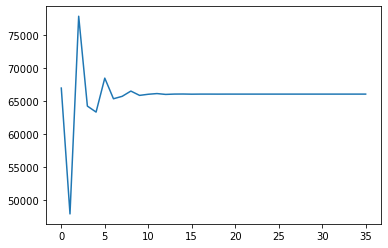

In [65]:
df[" Promedios_moviles_Ocupados_H "].plot()

In [66]:
Covariance = numpy.cov(df[" Promedios_moviles_Ocupados_H "], df[" Promedios_Moviles_Ocupados_M "], ddof=0)[0][1]
print(Covariance)

NameError: name 'numpy' is not defined

In [ ]:
import numpy as np

df[" Promedios_moviles_Ocupados_H "] = df[" Promedios_moviles_Ocupados_H "](df["Promedios_moviles_Ocupados_H"])
df[" Promedios_moviles_Ocupados_H "] = df[" Promedios_Moviles_Ocupados_M "](df["Promedios_Moviles_Ocupados_M"])

covariance = np.cov(df[" Promedios_moviles_Ocupados_H "], df[" Promedios_Moviles_Ocupados_M "])[0][1]
print(covariance)

In [ ]:
# Calcular la matriz de covarianza
covxy = np.cov(df["Promedios_moviles_Ocupados_H"], df["Promedios_Moviles_Ocupados_M"])
print(covxy)

In [ ]:
#
ar_model = AutoReg(df[' Promedios_moviles_Ocupados_H '], lags=5).fit()
#
# Print Summary
#
print(ar_model.summary())